<a href="https://colab.research.google.com/github/Pakhi27/CaliforniaHousePrice-DTR-and-Random-Forest/blob/main/California_House_price_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# California House Prices Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_california_housing

In [ ]:
sklearn.__version__

'1.2.2'

In [5]:
df=pd.read_csv('housing.csv')

In [6]:
dataset=pd.DataFrame(df)

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Exploratory data analysis

In [8]:
# missing values
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


<Axes: >

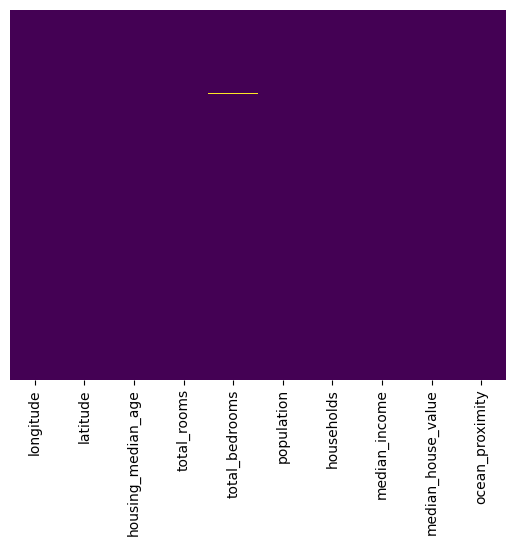

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
null_column='total_bedrooms'
df.dropna(subset=[null_column],axis=0,inplace=True)

<Axes: >

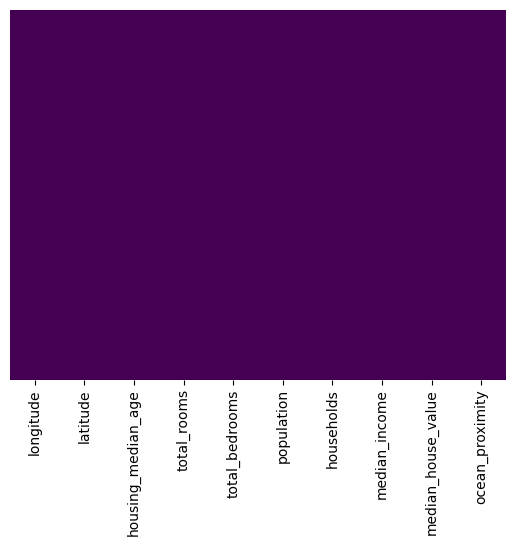

In [11]:
# no null value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: xlabel='median_house_value', ylabel='count'>

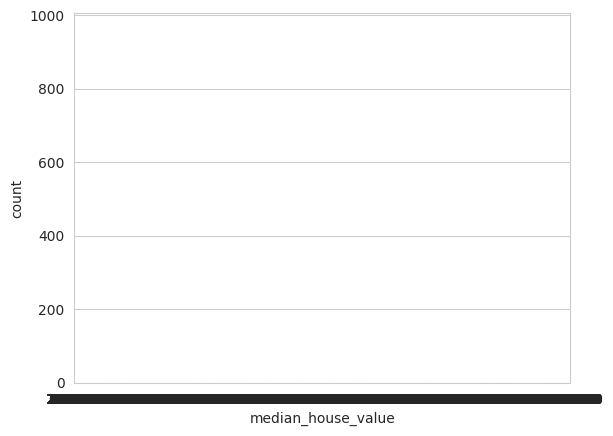

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='median_house_value',data=df)

<Axes: >

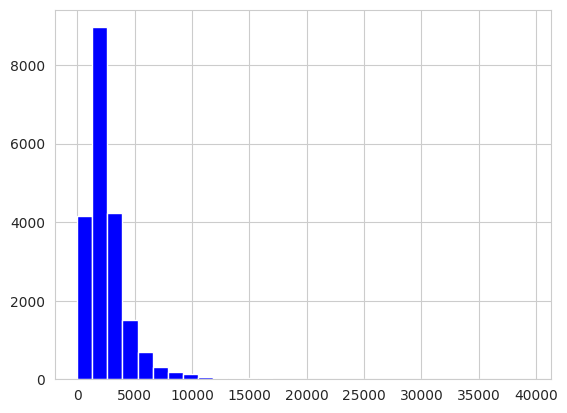

In [ ]:
# count of no of houses in a particular interval
df['total_rooms'].hist(bins=30,color='blue')

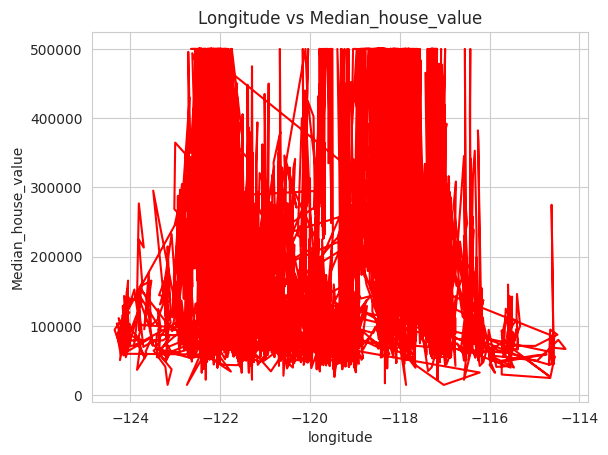

In [ ]:
x=df.longitude
y=df.median_house_value
plt.plot(x,y,color="red")
plt.xlabel('longitude')
plt.ylabel('Median_house_value')
plt.title('Longitude vs Median_house_value')
plt.show()

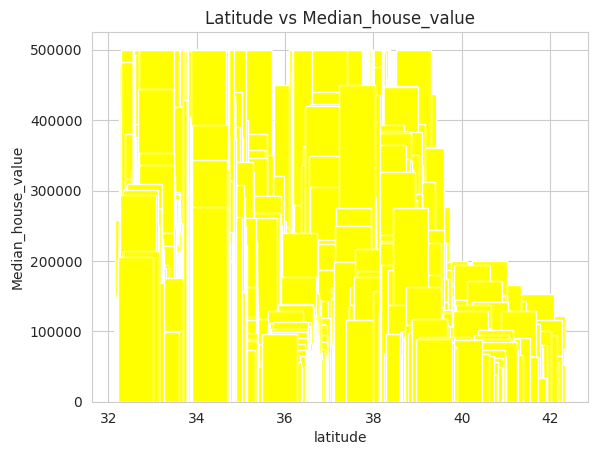

In [ ]:
x=df.latitude
y=df.median_house_value
plt.bar(x,y,color="yellow")
plt.xlabel('latitude')
plt.ylabel('Median_house_value')
plt.title('Latitude vs Median_house_value')
plt.show()

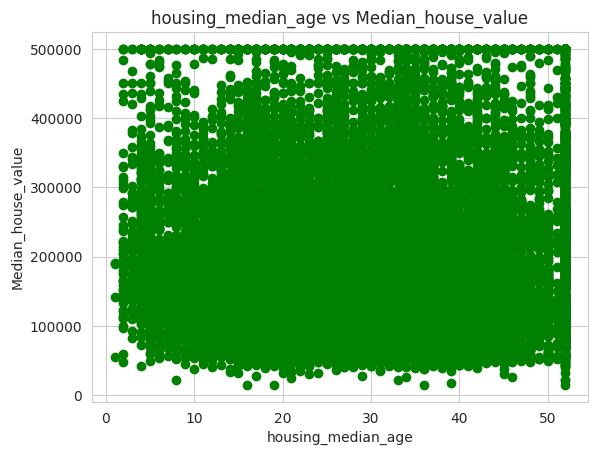

In [ ]:
x=df.housing_median_age
y=df.median_house_value
plt.scatter(x,y,color="green")
plt.xlabel('housing_median_age')
plt.ylabel('Median_house_value')
plt.title('housing_median_age vs Median_house_value')
plt.show()

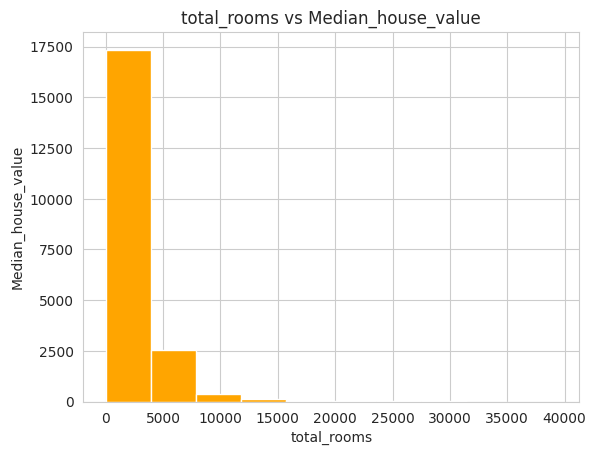

In [ ]:
x=df.total_rooms
y=df.median_house_value
plt.hist(x,color="orange")
plt.xlabel('total_rooms')
plt.ylabel('Median_house_value')
plt.title('total_rooms vs Median_house_value')
plt.show()

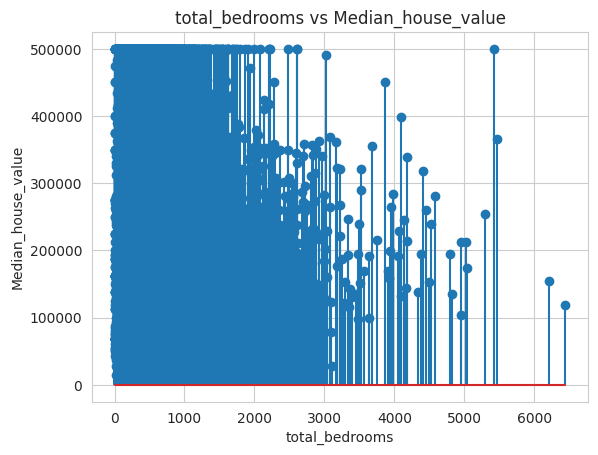

In [ ]:
x=df.total_bedrooms
y=df.median_house_value
plt.stem(x,y)
plt.xlabel('total_bedrooms')
plt.ylabel('Median_house_value')
plt.title('total_bedrooms vs Median_house_value')
plt.show()

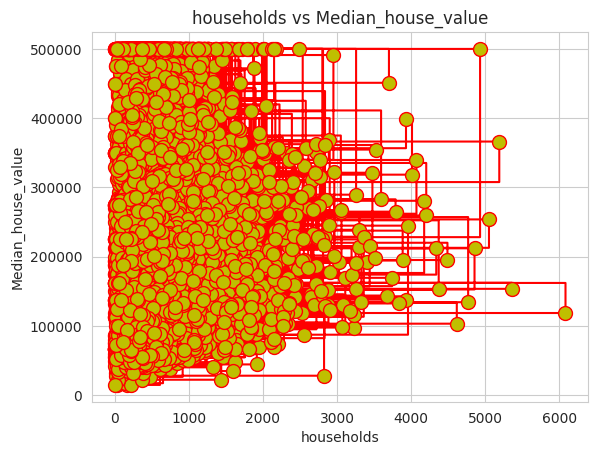

In [ ]:
x=df.households
y=df.median_house_value
plt.step(x,y,marker="o",color="r",ms=10,mfc="y")
plt.xlabel('households')
plt.ylabel('Median_house_value')
plt.title('households vs Median_house_value')
plt.show()

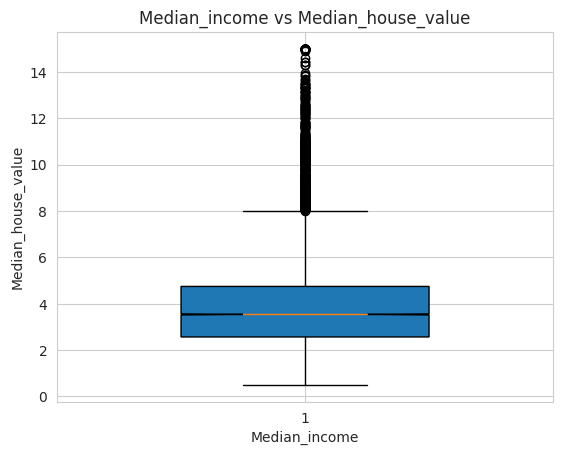

In [ ]:
x=df.median_income
y=df.median_house_value
plt.boxplot(x,notch=True,vert=True,widths=0.5,patch_artist=True)
plt.xlabel('Median_income')
plt.ylabel('Median_house_value')
plt.title('Median_income vs Median_house_value')
plt.show()
# sns.boxplot(x='df.median_income',y='df.median_house_value',data=df,palette='winter')

In [ ]:
# converting categorical values

In [13]:
pd.get_dummies(df['ocean_proximity'],drop_first=True).head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [14]:
ocean_proximity=pd.get_dummies(df['ocean_proximity'],drop_first=True)

In [15]:
df.drop('ocean_proximity',axis=1,inplace=True)

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [17]:
df=pd.concat([df,ocean_proximity],axis=1)

In [18]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [19]:
import random

# Assuming your data is loaded into a pandas DataFrame named 'df'

# Set the desired sample size (number of rows to sample)
sample_size = 10000  # Adjust this value as needed

index_list = df.index.tolist()
# Randomly sample rows from the DataFrame
sample = random.sample(index_list, sample_size)  # Sample by row index

# Select the rows based on the sampled indices
df = df.loc[sample]

print(df.shape)  # Print the shape of the reduced DataFrame


(10000, 13)


In [ ]:
# Building a linear Regression Model

In [20]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [21]:
df['median_house_value'].head()

9834     287500.0
6785     477300.0
14020    261500.0
15688    500001.0
9224      61900.0
Name: median_house_value, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [24]:
# standardising dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [26]:
# Training and Predicting

In [28]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [29]:
Regressor=LinearRegression()
mse=cross_val_score(Regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
Regressor.fit(X_train,y_train)
np.mean(mse)

-4920864112.489961

In [30]:
predictions=Regressor.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
r2 = r2_score(y_test, predictions)

In [33]:
r2

0.6232123701837202

In [34]:
predictions

array([323356.20979087, 106993.79610587, 355734.74116782, ...,
       123620.512066  , 229030.70641609, 328911.52106542])

<ipython-input-35-7994c0437043>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions-y_test)


<Axes: xlabel='median_house_value', ylabel='Density'>

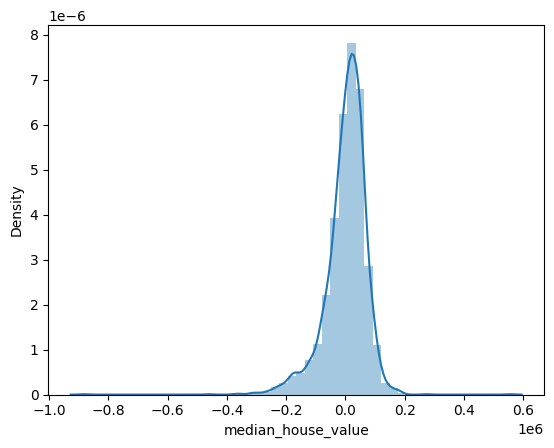

In [35]:
sns.distplot(predictions-y_test)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
treemodel=DecisionTreeRegressor(max_depth=2)

In [39]:
treemodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.529\nsquared_error = 13332290428.903\nsamples = 7000\nvalue = 207677.775'),
 Text(0.25, 0.5, 'x[8] <= 0.371\nsquared_error = 8144030447.6\nsamples = 5358\nvalue = 171597.641'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8020973635.223\nsamples = 3329\nvalue = 207994.731'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2606276485.301\nsamples = 2029\nvalue = 111880.581'),
 Text(0.75, 0.5, 'x[7] <= 1.583\nsquared_error = 12153225116.735\nsamples = 1642\nvalue = 325410.637'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8966903302.178\nsamples = 1217\nvalue = 289722.493'),
 Text(0.875, 0.16666666666666666, 'squared_error = 7186611511.66\nsamples = 425\nvalue = 427604.687')]

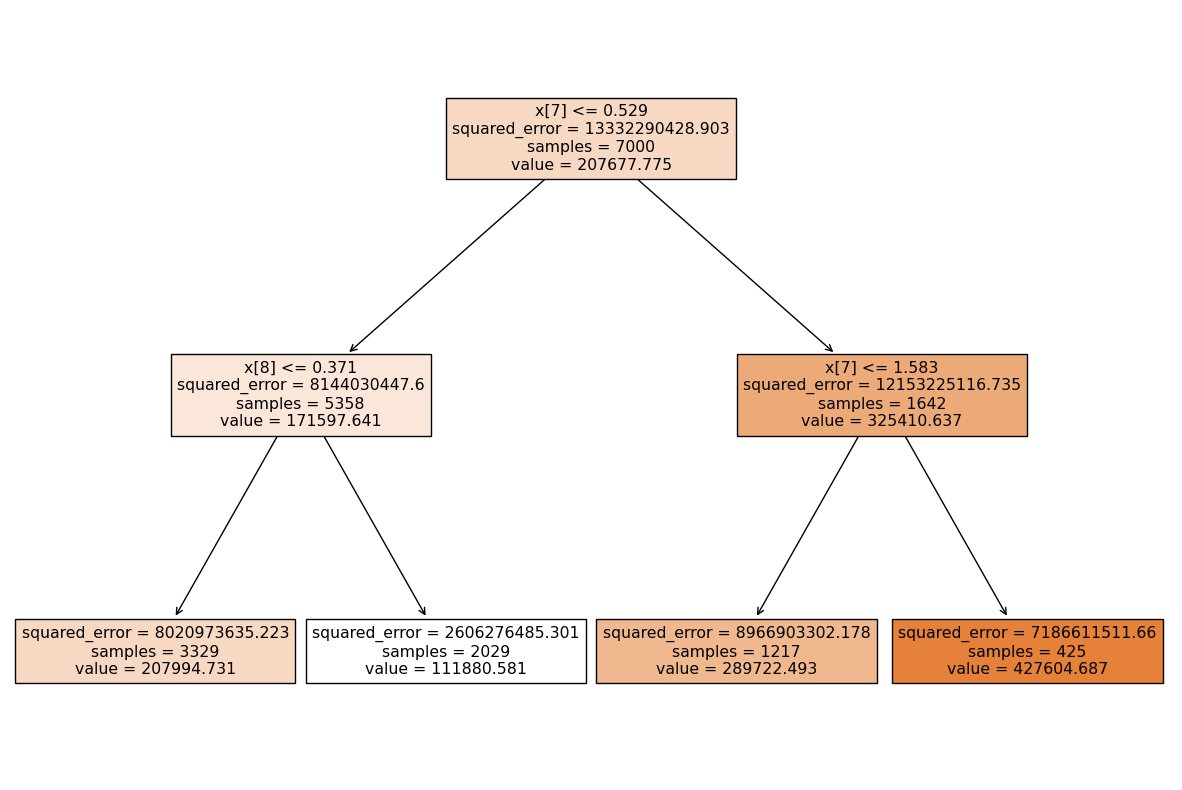

In [40]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [44]:
y_pred=treemodel.predict(X_test)

In [45]:
Regressor=LinearRegression()
mse=cross_val_score(Regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
treemodel.fit(X_train,y_train)
np.mean(mse)

-4920864112.489961

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
r2 = r2_score(y_test, y_pred)
r2

0.4917638491092682

In [49]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Example usage for classification
# clf = RandomForestClassifier(n_estimators=100)

# Example usage for regression
regressor = RandomForestRegressor()  # Create a regressor with 200 trees


In [50]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
y_pred=regressor.predict(X_test)
y_pred

array([347234.15, 123696.01, 339076.06, ..., 130861.  , 165862.  ,
       337321.02])

In [54]:
r2 = r2_score(y_test, y_pred)
r2

0.7855777790710856